# Neural Network Model

In [1]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X, y = data.data, data.target

In [2]:
# Split the preprocessed data into a training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [3]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [4]:
import tensorflow as tf
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units = 50, activation = 'relu' , input_dim = 30)) 

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units = 50, activation = 'relu' , input_dim = 30)) 

# Output layer
nn_model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Check the structure of the model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                1550      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 4,151
Trainable params: 4,151
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Compile the model
nn_model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [6]:
# Train the model
fit_model = nn_model.fit(X_train_scaled , y_train , epochs = 100)

Train on 426 samples
Epoch 1/100
426/426 [==============================] - 1s 3ms/sample - loss: 0.5663 - accuracy: 0.6596
Epoch 2/100
426/426 [==============================] - 0s 192us/sample - loss: 0.3032 - accuracy: 0.9437
Epoch 3/100
426/426 [==============================] - 0s 197us/sample - loss: 0.1898 - accuracy: 0.9507
Epoch 4/100
426/426 [==============================] - 0s 251us/sample - loss: 0.1348 - accuracy: 0.9577
Epoch 5/100
426/426 [==============================] - 0s 126us/sample - loss: 0.1065 - accuracy: 0.9671
Epoch 6/100
426/426 [==============================] - 0s 108us/sample - loss: 0.0892 - accuracy: 0.9718
Epoch 7/100
426/426 [==============================] - 0s 245us/sample - loss: 0.0770 - accuracy: 0.9765
Epoch 8/100
426/426 [==============================] - 0s 212us/sample - loss: 0.0677 - accuracy: 0.9812
Epoch 9/100
426/426 [==============================] - 0s 152us/sample - loss: 0.0607 - accuracy: 0.9836
Epoch 10/100
426/426 [==============

In [7]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

143/143 - 0s - loss: 0.1474 - accuracy: 0.9650
Loss: 0.14738073749663114, Accuracy: 0.9650349617004395


# PCA 

In [44]:
# Create dataframe from features and target and preview
import pandas as pd
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target
df.columns = df.columns.str.replace(' ', '_')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [17]:
from sklearn.decomposition import PCA
# Initialize PCA model
pca = PCA(n_components=3)

# Get two principal components for the data.
cancer_pca = pca.fit_transform(df)

In [18]:
# Transform PCA data to a DataFrame
df_cancer_pca = pd.DataFrame(
    data=cancer_pca, columns=["principal component 1", "principal component 2", "principal component 3"]
)
df_cancer_pca.head()

,principal component 1,principal component 2,principal component 3
0,1160.142744,-293.917535,48.578388
1,1269.122597,15.630194,-35.394338
2,995.794082,39.156723,-1.709922
3,-407.180411,-67.380505,8.671338
4,930.341382,189.340710,1.374512


In [19]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.98204444, 0.01617648, 0.00155751])

In [61]:
from sklearn.cluster import KMeans

# Initialize the K-Means model
model = KMeans(n_clusters=2, random_state=0)

# Fit the model
model.fit(df_cancer_pca)

# Predict clusters
predictions = model.predict(df_cancer_pca)

# Add the predicted class columns
df_cancer_pca["class"] = data.target
df_cancer_pca.head(5)

,principal component 1,principal component 2,principal component 3,class
0,1160.142744,-293.917535,48.578388,0
1,1269.122597,15.630194,-35.394338,0
2,995.794082,39.156723,-1.709922,0
3,-407.180411,-67.380505,8.671338,0
4,930.341382,189.340710,1.374512,0


In [58]:
# BONUS: plot the 3 principal components
import plotly.express as px
fig = px.scatter_3d(
    df_cancer_pca,
    x="principal component 3",
    y="principal component 2",
    z="principal component 1",
    color="class",
    symbol="class",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

# Feature Importance

In [26]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler1 = scaler.fit(X)

# Scale the data
X_scaled1 = X_scaler1.transform(X)

In [30]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

model = LogisticRegression()
model.fit(X_scaled1, y)
importance = model.coef_[0]
# importance=np.sort(importance)
importance

array([-0.36317072, -0.38770299, -0.35111444, -0.43555896, -0.16176493,
        0.56259548, -0.85989759, -0.96222175,  0.07616775,  0.32218585,
       -1.29103479,  0.26892526, -0.65988685, -1.01250087, -0.27717046,
        0.7362824 ,  0.11052647, -0.3335099 ,  0.29590225,  0.68091528,
       -1.02936114, -1.31459312, -0.82331706, -1.01059356, -0.67073135,
        0.04465888, -0.87330064, -0.91195815, -0.88789694, -0.47983137])

In [31]:
for index,val in enumerate(importance):
    print("Feature : {} has score  : {} ".format(index,val))

Feature : 0 has score  : -0.36317071884095675 
Feature : 1 has score  : -0.387702991040544 
Feature : 2 has score  : -0.3511144376100206 
Feature : 3 has score  : -0.4355589606388643 
Feature : 4 has score  : -0.16176493207757392 
Feature : 5 has score  : 0.562595484041476 
Feature : 6 has score  : -0.8598975867218135 
Feature : 7 has score  : -0.9622217513117578 
Feature : 8 has score  : 0.07616774713570576 
Feature : 9 has score  : 0.3221858530362269 
Feature : 10 has score  : -1.2910347918788785 
Feature : 11 has score  : 0.2689252641805738 
Feature : 12 has score  : -0.6598868525569134 
Feature : 13 has score  : -1.012500874474462 
Feature : 14 has score  : -0.277170461383275 
Feature : 15 has score  : 0.736282402308155 
Feature : 16 has score  : 0.11052646668591615 
Feature : 17 has score  : -0.3335098977038852 
Feature : 18 has score  : 0.2959022504275062 
Feature : 19 has score  : 0.6809152776928908 
Feature : 20 has score  : -1.0293611407744123 
Feature : 21 has score  : -1.314

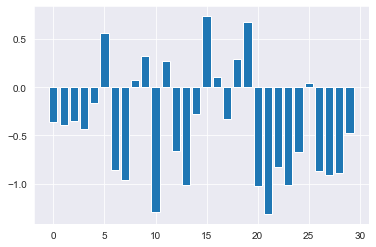

In [32]:
#plotting the features and their score in ascending order
sns.set_style("darkgrid")
plt.bar([i for i in range (len(importance))],importance)
plt.show()

In [33]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [34]:
# Create dataframe from features and target and preview
df_importance = pd.DataFrame(importance)
df_importance.head()

,0
0,-0.363171
1,-0.387703
2,-0.351114
3,-0.435559
4,-0.161765


In [60]:
# Create dataframe from features and target and preview
df_column = pd.DataFrame(df.columns)
df_column.head(30)

,0
0,mean_radius
1,mean_texture
2,mean_perimeter
3,mean_area
4,mean_smoothness
5,mean_compactness
6,mean_concavity
7,mean_concave_points
8,mean_symmetry
9,mean_fractal_dimension


In [42]:
df_merged = df_importance.merge(df_column, left_index=True, right_index=True)
df_merged.head(30)

,0_x,0_y
0,-0.363171,mean radius
1,-0.387703,mean texture
2,-0.351114,mean perimeter
3,-0.435559,mean area
4,-0.161765,mean smoothness
5,0.562595,mean compactness
6,-0.859898,mean concavity
7,-0.962222,mean concave points
8,0.076168,mean symmetry
9,0.322186,mean fractal dimension


In [56]:
#plotting the features and their score in ascending order
df_merged.plot.bar


<bound method PlotAccessor.bar of <pandas.plotting._core.PlotAccessor object at 0x0000015644558A20>>

In [ ]:
# get accuracy from logistic regression
